**Import Pandas and Load the data.**


In [51]:
import pandas as pd

In [52]:
df=pd.read_csv('ESG_Data.csv')

In [116]:
#display the head
df.head()

,Country Name,Country Code,Series Name,Series Code,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2009 [YR2009]
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,89.500000,71.500000,97.700000,97.700000,93.430878,97.700000,97.700000,97.700000,NaN,NaN,42.700000,43.222019,69.100000,68.040878,48.279007
1,Afghanistan,AFG,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,25.700000,27.250000,28.500000,30.000000,31.100000,32.450000,33.800000,35.400000,NaN,NaN,19.700000,21.300000,22.700000,24.300000,18.200000
2,Afghanistan,AFG,Adjusted savings: natural resources depletion ...,NY.ADJ.DRES.GN.ZS,0.315571,0.290261,0.363282,0.350879,0.401053,0.370131,0.243668,0.335935,NaN,NaN,0.359454,0.386644,0.380988,0.335091,0.270365
3,Afghanistan,AFG,Adjusted savings: net forest depletion (% of GNI),NY.ADJ.DFOR.GN.ZS,0.216609,0.232762,0.284781,0.229822,0.237615,0.269353,0.237958,0.317732,NaN,NaN,0.292788,0.244239,0.211376,0.211413,0.229864
4,Afghanistan,AFG,"Agriculture, forestry, and fishing, value adde...",NV.AGR.TOTL.ZS,22.137041,20.634323,25.740314,26.420199,22.042897,25.773971,29.975583,33.597619,NaN,NaN,26.210069,23.743664,24.390874,22.810663,29.297501


**Exploratory Data Analysis**

In [117]:
#display the columns
df.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]',
       '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]',
       '2022 [YR2022]', '2023 [YR2023]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2009 [YR2009]'],
      dtype='object')

In [58]:
#Find out the unique series names
df['Series Name'].unique()

array(['Access to electricity (% of population)',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Adjusted savings: natural resources depletion (% of GNI)',
       'Adjusted savings: net forest depletion (% of GNI)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'Annualized average growth rate in per capita real survey mean consumption or income, total population (%)',
       'Control of Corruption: Estimate',
       'Electricity production from coal sources (% of total)',
       'Energy imports, net (% of energy use)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Energy use (kg of oil equivalent per capita)',
       'Forest area (% of land area)',
       'Fossil fuel energy consumption (% of total)',
       'GHG net emissions/removals by LUCF (Mt of CO2 equivalent)',
       'Individuals using the Internet (% of population)',
       'Methane emissions (metric tons of CO2 equivalent per

In [59]:
# Convert all yearly columns to numeric, forcing errors to NaN
year_columns = [col for col in df.columns if 'YR' in col]

for col in year_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert strings to numbers, set invalid ones to NaN

# Display any remaining non-numeric values
non_numeric = df[year_columns].applymap(lambda x: isinstance(x, str)).sum()
print("Columns with non-numeric values:", non_numeric[non_numeric > 0])

Columns with non-numeric values: Series([], dtype: int64)


<ipython-input-59-04f62e4d5888>:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric = df[year_columns].applymap(lambda x: isinstance(x, str)).sum()


In [60]:
# Drop missing Series Names
df = df.dropna(subset=['Series Name'])

# Pivot table so that each 'Series Name' becomes a column
df_pivot = df.pivot_table(
    index=['Country Name', 'Country Code'],  # Keep Country & Year as row identifiers
    columns='Series Name',  # Convert ESG metrics to columns
    values=[col for col in df.columns if 'YR' in col]  # Keep yearly data
)

# Flatten the multi-level column index
df_pivot.columns = ['_'.join(col).strip() for col in df_pivot.columns]

# Reset index to remove multi-index structure
df_pivot.reset_index(inplace=True)

# Display transformed data
df_pivot.head()

,Country Name,Country Code,2009 [YR2009]_Access to clean fuels and technologies for cooking (% of population),2009 [YR2009]_Access to electricity (% of population),2009 [YR2009]_Adjusted savings: natural resources depletion (% of GNI),2009 [YR2009]_Adjusted savings: net forest depletion (% of GNI),"2009 [YR2009]_Agriculture, forestry, and fishing, value added (% of GDP)",2009 [YR2009]_Control of Corruption: Estimate,2009 [YR2009]_Electricity production from coal sources (% of total),"2009 [YR2009]_Energy imports, net (% of energy use)",...,2022 [YR2022]_Control of Corruption: Estimate,2022 [YR2022]_Individuals using the Internet (% of population),2022 [YR2022]_Political Stability and Absence of Violence/Terrorism: Estimate,2022 [YR2022]_Poverty headcount ratio at national poverty lines (% of population),2022 [YR2022]_Proportion of seats held by women in national parliaments (%),2022 [YR2022]_Ratio of female to male labor force participation rate (%) (modeled ILO estimate),2022 [YR2022]_Rule of Law: Estimate,"2023 [YR2023]_Annualized average growth rate in per capita real survey mean consumption or income, total population (%)",2023 [YR2023]_Poverty headcount ratio at national poverty lines (% of population),2023 [YR2023]_Ratio of female to male labor force participation rate (%) (modeled ILO estimate)
0,Afghanistan,AFG,18.2,48.279007,0.270365,0.229864,29.297501,-1.552299,NaN,NaN,...,-1.183776,NaN,-2.550802,NaN,NaN,7.345374,-1.658442,NaN,NaN,6.985358
1,Albania,ALB,63.1,99.554451,0.492035,0.076017,16.794384,-0.545271,0.0,41.667246,...,-0.407876,82.613686,0.114945,NaN,35.714286,78.034358,-0.165779,NaN,NaN,78.083103
2,Algeria,DZA,99.1,98.824860,15.375818,0.000000,9.343365,-0.614938,0.0,-275.425610,...,-0.637930,NaN,-0.741772,NaN,8.108108,24.599639,-0.832473,NaN,NaN,25.098150
3,Andorra,AND,100.0,100.000000,NaN,NaN,0.418929,1.317765,NaN,NaN,...,1.270204,NaN,1.587736,NaN,46.428571,NaN,1.485450,NaN,NaN,NaN
4,Angola,AGO,44.1,33.846977,26.226488,0.521896,6.621197,-1.397766,0.0,-764.549421,...,-0.601941,NaN,-0.646241,NaN,33.636364,93.386067,-1.021905,NaN,NaN,93.598847


In [62]:
# Convert year columns to numeric
year_columns = [col for col in df.columns if 'YR' in col]
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

# Reshape using melt to make it "vertical"
df_long = df.melt(
    id_vars=['Country Name', 'Country Code', 'Series Name'],
    value_vars=year_columns,
    var_name='Year',
    value_name='Value'
)

# Clean up the 'Year' column to keep only the numeric year
df_long['Year'] = df_long['Year'].str.extract(r'(\d{4})').astype(int)

# Pivot to make series names into individual columns
df1 = df_long.pivot_table(
    index=['Country Name', 'Country Code', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

# Flatten column names
df1.columns = df1.columns.map(lambda x: x.replace(' ', '_') if isinstance(x, str) else x)

# Display transformed data
df1.head()

Series Name,Country_Name,Country_Code,Year,Access_to_clean_fuels_and_technologies_for_cooking_(%_of_population),Access_to_electricity_(%_of_population),Adjusted_savings:_natural_resources_depletion_(%_of_GNI),Adjusted_savings:_net_forest_depletion_(%_of_GNI),"Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)","Annualized_average_growth_rate_in_per_capita_real_survey_mean_consumption_or_income,_total_population_(%)",Control_of_Corruption:_Estimate,...,Population_ages_65_and_above_(%_of_total_population),Population_density_(people_per_sq._km_of_land_area),Poverty_headcount_ratio_at_national_poverty_lines_(%_of_population),Proportion_of_seats_held_by_women_in_national_parliaments_(%),Ratio_of_female_to_male_labor_force_participation_rate_(%)_(modeled_ILO_estimate),Renewable_electricity_output_(%_of_total_electricity_output),Renewable_energy_consumption_(%_of_total_final_energy_consumption),Research_and_development_expenditure_(%_of_GDP),Rule_of_Law:_Estimate,Strength_of_legal_rights_index_(0=weak_to_12=strong)
0,Afghanistan,AFG,2009,18.2,48.279007,0.270365,0.229864,29.297501,NaN,-1.552299,...,2.335292,41.987193,NaN,27.309237,19.612480,87.176603,16.53,NaN,-1.876119,NaN
1,Afghanistan,AFG,2010,19.7,42.700000,0.359454,0.292788,26.210069,NaN,-1.645391,...,2.353431,43.220447,NaN,27.710843,19.659774,85.986547,15.15,NaN,-1.870058,NaN
2,Afghanistan,AFG,2011,21.3,43.222019,0.386644,0.244239,23.743664,NaN,-1.600471,...,2.373882,44.844851,38.3,27.710843,20.155168,82.487562,12.61,NaN,-1.922500,NaN
3,Afghanistan,AFG,2012,22.7,69.100000,0.380988,0.211376,24.390874,NaN,-1.430373,...,2.391985,46.711251,NaN,27.710843,20.778987,85.909980,15.36,NaN,-1.651893,NaN
4,Afghanistan,AFG,2013,24.3,68.040878,0.335091,0.211413,22.810663,NaN,-1.445908,...,2.403285,48.359028,NaN,27.710843,22.217896,78.636408,16.86,NaN,-1.609112,9.0


In [63]:
df1.shape

(3059, 31)

**Dealing with Nulls**

In [64]:
# Check data types and missing values
print("\nColumn Data Types:")
print(df1.dtypes)

print("\nMissing Values Per Column:")
print(df1.isnull().sum())


Column Data Types:
Series Name
Country_Name                                                                                                  object
Country_Code                                                                                                  object
Year                                                                                                           int64
Access_to_clean_fuels_and_technologies_for_cooking_(%_of_population)                                         float64
Access_to_electricity_(%_of_population)                                                                      float64
Adjusted_savings:_natural_resources_depletion_(%_of_GNI)                                                     float64
Adjusted_savings:_net_forest_depletion_(%_of_GNI)                                                            float64
Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)                                                   float64
Annualized_average_growth_rate_i

In [65]:
#Ensuring consistency of datatypes
df1[['Country_Name','Country_Code']]= df1[['Country_Name','Country_Code']].astype(str)

In [66]:
# Drop columns with more than 50% missing values
missing_threshold = len(df1) * 0.5
df1 = df1.dropna(thresh=missing_threshold, axis=1)

# Verify remaining columns
print("Remaining columns after dropping highly missing ones:", df1.shape[1])

Remaining columns after dropping highly missing ones: 21


In [67]:
# Sort by Country and Year to ensure time-series consistency
df1= df1.sort_values(['Country_Name', 'Year'])

# Apply Forward Fill
time_series_cols = [
    'Access_to_clean_fuels_and_technologies_for_cooking_(%_of_population)',
    'Access_to_electricity_(%_of_population)',
    'GDP_growth_(annual_%)',
    'Individuals_using_the_Internet_(%_of_population)',
    'Labor_force_participation_rate,_total_(%_of_total_population_ages_15-64)_(modeled_ILO_estimate)',
    'People_using_safely_managed_drinking_water_services_(%_of_population)',
    'People_using_safely_managed_sanitation_services_(%_of_population)',
    'Proportion_of_seats_held_by_women_in_national_parliaments_(%)',
    'Renewable_electricity_output_(%_of_total_electricity_output)',
    'Renewable_energy_consumption_(%_of_total_final_energy_consumption)',
    'Unemployment,_total_(%_of_total_labor_force)_(modeled_ILO_estimate)'
]

existing_cols = [col for col in time_series_cols if col in df1.columns]

df1 = df1.sort_values(['Country_Name', 'Year'])  # Sort by Country and Year
df1[existing_cols] = df1[existing_cols].fillna(method='ffill')  # Apply forward fill

<ipython-input-67-82b3b9fbfccb>:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1[existing_cols] = df1[existing_cols].fillna(method='ffill')  # Apply forward fill


In [68]:
numerical_cols = [
    'CO2_emissions_(metric_tons_per_capita)',
    'Energy_imports,_net_(%_of_energy_use)',
    'Energy_intensity_level_of_primary_energy_(MJ/$2017_PPP_GDP)',
    'Energy_use_(kg_of_oil_equivalent_per_capita)',
    'Fossil_fuel_energy_consumption_(%_of_total)',
    'Gini_index',
    'Government_Effectiveness:_Estimate',
    'Methane_emissions_(metric_tons_of_CO2_equivalent_per_capita)',
    'Nitrous_oxide_emissions_(metric_tons_of_CO2_equivalent_per_capita)',
    'PM2.5_air_pollution,_mean_annual_exposure_(micrograms_per_cubic_meter)',
    'Poverty_headcount_ratio_at_national_poverty_lines_(%_of_population)',
    'Strength_of_legal_rights_index_(0=weak_to_12=strong)'
]
existing_cols = [col for col in numerical_cols if col in df1.columns]
df1[existing_cols] = df1[existing_cols].fillna(df1[existing_cols].mean())

In [69]:
# Check if all missing values are handled
print("\nMissing Values After Cleaning:")
print(df1.isnull().sum().sum())  # Should print 0


Missing Values After Cleaning:
4267


In [70]:
print("\nMissing Values Per Column:")
print(df1.isnull().sum())


Missing Values Per Column:
Series Name
Country_Name                                                                           0
Country_Code                                                                           0
Year                                                                                   0
Access_to_clean_fuels_and_technologies_for_cooking_(%_of_population)                   0
Access_to_electricity_(%_of_population)                                                0
Adjusted_savings:_natural_resources_depletion_(%_of_GNI)                             625
Adjusted_savings:_net_forest_depletion_(%_of_GNI)                                    608
Agriculture,_forestry,_and_fishing,_value_added_(%_of_GDP)                           331
Control_of_Corruption:_Estimate                                                      370
Energy_intensity_level_of_primary_energy_(MJ/$2017_PPP_GDP)                            0
Forest_area_(%_of_land_area)                                          

In [71]:
df1.shape

(3059, 21)

In [72]:
# Drop columns with more than 50% missing values
missing_threshold = len(df1) * 0.5
df1 = df1.dropna(thresh=missing_threshold, axis=1)

# Verify remaining columns
print("Remaining columns after dropping highly missing ones:", df1.shape[1])

Remaining columns after dropping highly missing ones: 21


In [104]:
print("\nMissing Values Per Column:")
print(df1.isnull().sum())


Missing Values Per Column:
Series Name
country_name                                                                     0
country_code                                                                     0
year                                                                             0
access_to_clean_fuels_and_technologies_for_cooking_%_of_population               0
access_to_electricity_%_of_population                                            0
adjusted_savings_natural_resources_depletion_%_of_gni                            0
adjusted_savings_net_forest_depletion_%_of_gni                                   0
agriculture,_forestry,_and_fishing,_value_added_%_of_gdp                         0
control_of_corruption_estimate                                                   0
energy_intensity_level_of_primary_energy_mj_$2017_ppp_gdp                        0
forest_area_%_of_land_area                                                       0
individuals_using_the_internet_%_of_population 

In [103]:
# Handling missing values for the remaining columns with appropriate methods

# 1. 'ratio_of_female_to_male_labor_force_participation_rate_%_modeled_ilo_estimate' (Social Factor)
# Since labor force participation rates follow a trend, we use forward fill followed by interpolation
df1['ratio_of_female_to_male_labor_force_participation_rate_%_modeled_ilo_estimate'] = df1[
    'ratio_of_female_to_male_labor_force_participation_rate_%_modeled_ilo_estimate'
].fillna(method='ffill')
df1['ratio_of_female_to_male_labor_force_participation_rate_%_modeled_ilo_estimate'] = df1[
    'ratio_of_female_to_male_labor_force_participation_rate_%_modeled_ilo_estimate'
].interpolate()

# 2. 'rule_of_law_estimate' (Governance Factor)
# Since rule of law changes slowly over time, we use backward fill followed by interpolation
df1['rule_of_law_estimate'] = df1[
    'rule_of_law_estimate'
].fillna(method='bfill')
df1['rule_of_law_estimate'] = df1[
    'rule_of_law_estimate'
].interpolate()

# Verify that missing values are handled
df1[
    [
        'ratio_of_female_to_male_labor_force_participation_rate_%_modeled_ilo_estimate',
        'rule_of_law_estimate',
    ]
].isnull().sum()


<ipython-input-103-c5cdc86fde92>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ].fillna(method='ffill')
<ipython-input-103-c5cdc86fde92>:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ].fillna(method='bfill')


,0
Series Name,
ratio_of_female_to_male_labor_force_participation_rate_%_modeled_ilo_estimate,0
rule_of_law_estimate,0


In [101]:
# Handling missing values for the remaining columns with appropriate methods

# 1. 'political_stability_and_absence_of_violence_terrorism_estimate' (Governance Factor)
# Since political stability changes gradually over time, we use backward fill followed by interpolation
df1['political_stability_and_absence_of_violence_terrorism_estimate'] = df1[
    'political_stability_and_absence_of_violence_terrorism_estimate'
].fillna(method='bfill')
df1['political_stability_and_absence_of_violence_terrorism_estimate'] = df1[
    'political_stability_and_absence_of_violence_terrorism_estimate'
].interpolate()

# 2. 'population_ages_65_and_above_%_of_total_population' (Demographic Trend)
# Since population trends follow a smooth increase, we use forward fill followed by interpolation
df1['population_ages_65_and_above_%_of_total_population'] = df1[
    'population_ages_65_and_above_%_of_total_population'
].fillna(method='ffill')
df1['population_ages_65_and_above_%_of_total_population'] = df1[
    'population_ages_65_and_above_%_of_total_population'
].interpolate()

# 3. 'population_density_people_per_sq._km_of_land_area' (Demographic/Geographic Trend)
# Population density changes slowly, so we apply forward fill followed by interpolation
df1['population_density_people_per_sq._km_of_land_area'] = df1[
    'population_density_people_per_sq._km_of_land_area'
].fillna(method='ffill')
df1['population_density_people_per_sq._km_of_land_area'] = df1[
    'population_density_people_per_sq._km_of_land_area'
].interpolate()

# Verify that missing values are handled
df1[
    [
        'political_stability_and_absence_of_violence_terrorism_estimate',
        'population_ages_65_and_above_%_of_total_population',
        'population_density_people_per_sq._km_of_land_area',
    ]
].isnull().sum()


<ipython-input-101-cc18701ca355>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ].fillna(method='bfill')
<ipython-input-101-cc18701ca355>:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ].fillna(method='ffill')
<ipython-input-101-cc18701ca355>:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ].fillna(method='ffill')


,0
Series Name,
political_stability_and_absence_of_violence_terrorism_estimate,0
population_ages_65_and_above_%_of_total_population,0
population_density_people_per_sq._km_of_land_area,0


In [99]:
# Since 'forest_area_%_of_land_area' is a time-dependent variable, we will use forward fill first and then interpolate if needed.

# Apply forward fill for missing values in 'forest_area_%_of_land_area'
df1['forest_area_%_of_land_area'] = df1['forest_area_%_of_land_area'].fillna(method='ffill')

# If any missing values remain, apply interpolation
df1['forest_area_%_of_land_area'] = df1['forest_area_%_of_land_area'].interpolate()

# Verify that missing values are handled
df1['forest_area_%_of_land_area'].isnull().sum()


<ipython-input-99-ed038c819ecc>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['forest_area_%_of_land_area'] = df1['forest_area_%_of_land_area'].fillna(method='ffill')


0

In [97]:
# Forward fill for time-series related data (assumes missing values follow a pattern)
time_series_impute = [
    'adjusted_savings_natural_resources_depletion_%_of_gni',
    'adjusted_savings_net_forest_depletion_%_of_gni',
    'agriculture,_forestry,_and_fishing,_value_added_%_of_gdp'
]

df1[time_series_impute] = df1[time_series_impute].fillna(method='ffill')

# Backward fill for governance factors (assumes missing values can be carried forward)
governance_impute = ['control_of_corruption_estimate']
df1[governance_impute] = df1[governance_impute].fillna(method='bfill')

# If any missing values remain after forward/backward fill, use interpolation
df1[time_series_impute + governance_impute] = df1[time_series_impute + governance_impute].interpolate()

# Verify that all missing values are handled
df1[time_series_impute + governance_impute].isnull().sum()


<ipython-input-97-c9cfe9f3bc3b>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1[time_series_impute] = df1[time_series_impute].fillna(method='ffill')
<ipython-input-97-c9cfe9f3bc3b>:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1[governance_impute] = df1[governance_impute].fillna(method='bfill')


,0
Series Name,
adjusted_savings_natural_resources_depletion_%_of_gni,0
adjusted_savings_net_forest_depletion_%_of_gni,0
"agriculture,_forestry,_and_fishing,_value_added_%_of_gdp",0
control_of_corruption_estimate,0


In [87]:
df1.columns

Index(['country_name', 'country_code', 'year',
       'access_to_clean_fuels_and_technologies_for_cooking_%_of_population',
       'access_to_electricity_%_of_population',
       'adjusted_savings_natural_resources_depletion_%_of_gni',
       'adjusted_savings_net_forest_depletion_%_of_gni',
       'agriculture,_forestry,_and_fishing,_value_added_%_of_gdp',
       'control_of_corruption_estimate',
       'energy_intensity_level_of_primary_energy_mj_$2017_ppp_gdp',
       'forest_area_%_of_land_area',
       'individuals_using_the_internet_%_of_population',
       'methane_emissions_metric_tons_of_co2_equivalent_per_capita',
       'nitrous_oxide_emissions_metric_tons_of_co2_equivalent_per_capita',
       'political_stability_and_absence_of_violence_terrorism_estimate',
       'population_ages_65_and_above_%_of_total_population',
       'population_density_people_per_sq._km_of_land_area',
       'proportion_of_seats_held_by_women_in_national_parliaments_%',
       'ratio_of_female_to_ma

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


**Correlation Matrix**

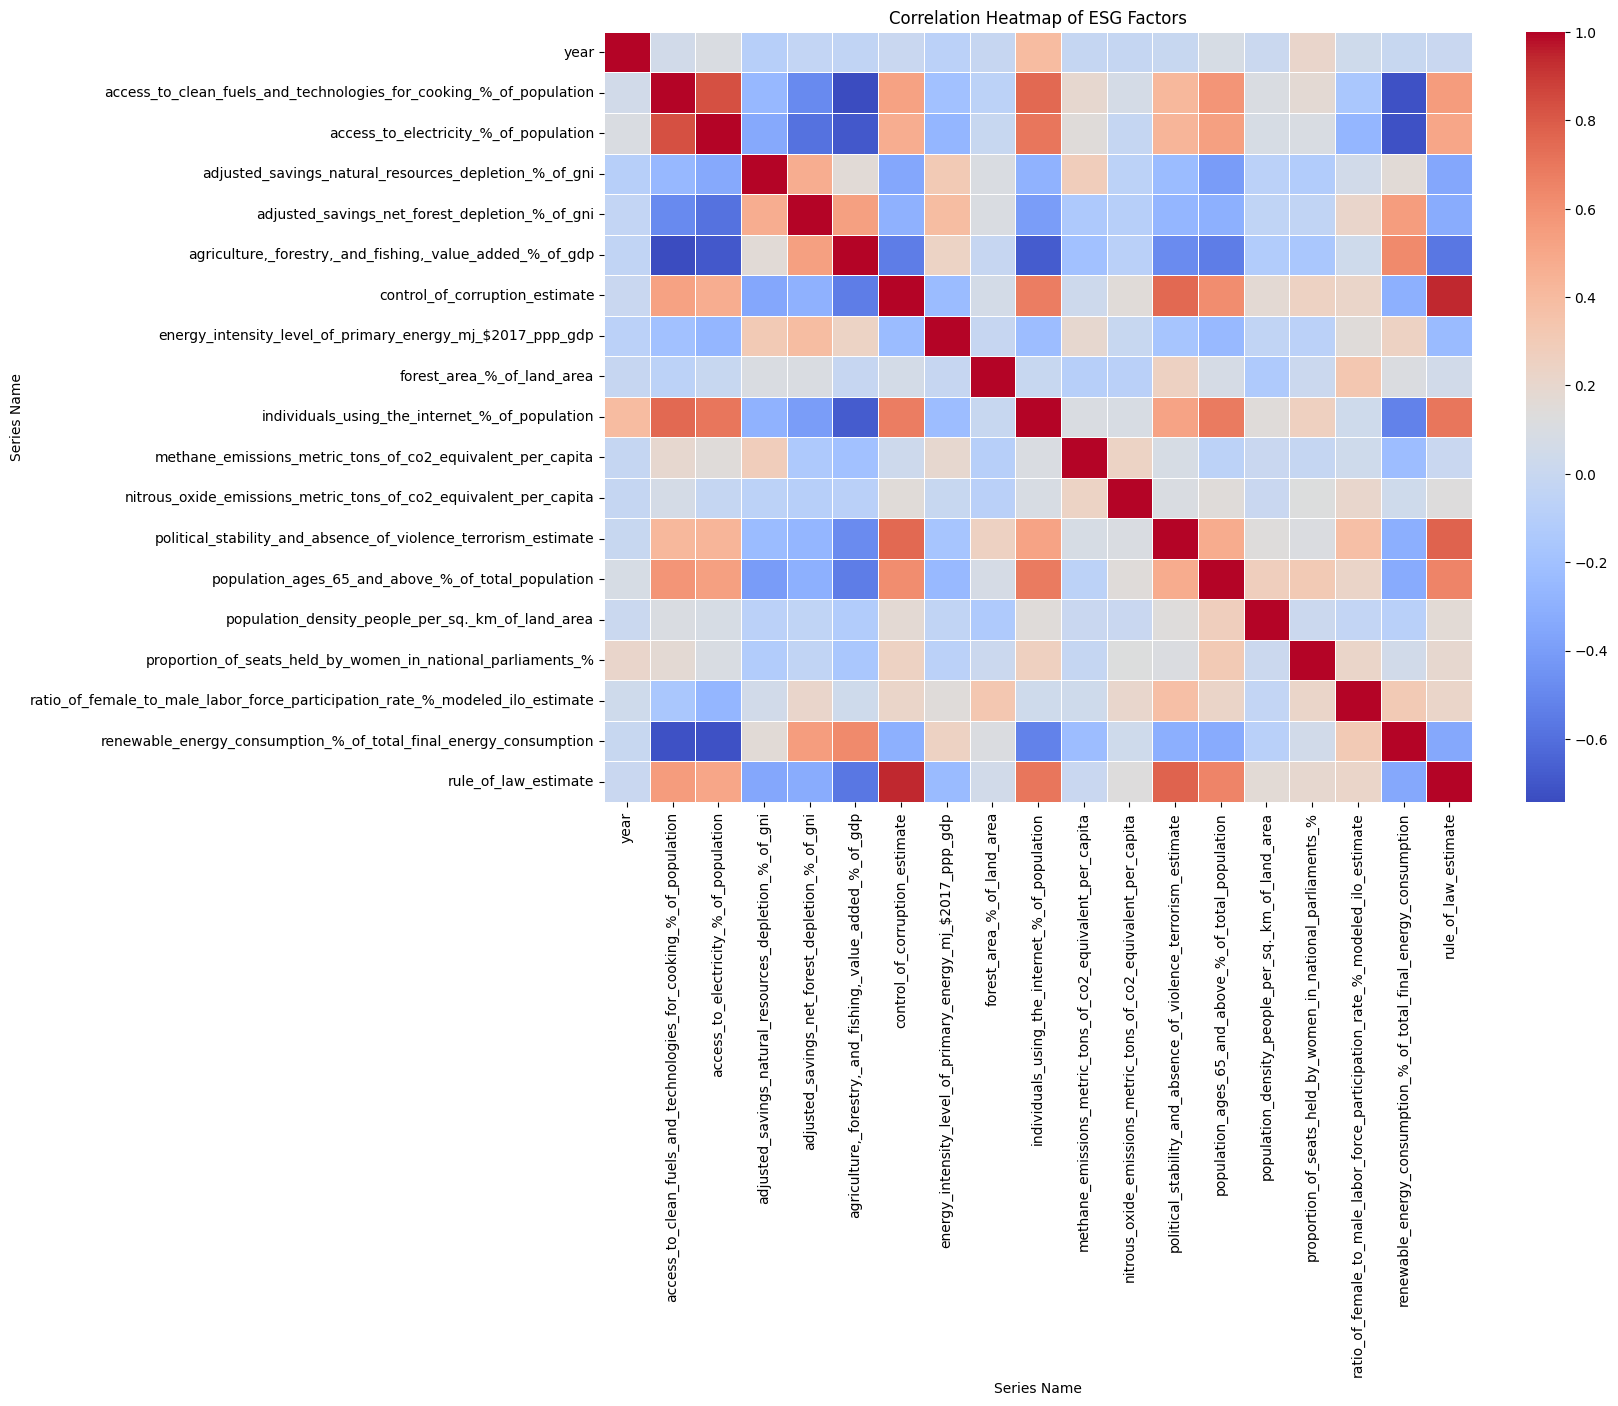

In [90]:
# Select only numeric columns
numeric_df = df1.select_dtypes(include=[np.number])

# Generate the correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of ESG Factors")
plt.show()


**Split the data to train and test**

In [94]:
from sklearn.model_selection import train_test_split

# Explicitly define feature columns that exist in the dataset
features = [
    'adjusted_savings_natural_resources_depletion_%_of_gni',
    'adjusted_savings_net_forest_depletion_%_of_gni',
    'agriculture,_forestry,_and_fishing,_value_added_%_of_gdp',
    'energy_intensity_level_of_primary_energy_mj_$2017_ppp_gdp',
    'access_to_clean_fuels_and_technologies_for_cooking_%_of_population',
    'access_to_electricity_%_of_population',
    'individuals_using_the_internet_%_of_population',
    'population_ages_65_and_above_%_of_total_population',
    'population_density_people_per_sq._km_of_land_area',
    'ratio_of_female_to_male_labor_force_participation_rate_%_modeled_ilo_estimate',
    'control_of_corruption_estimate',
    'political_stability_and_absence_of_violence_terrorism_estimate',
    'rule_of_law_estimate',
    'proportion_of_seats_held_by_women_in_national_parliaments_%'
]

# Define target variable explicitly
target = 'renewable_energy_consumption_%_of_total_final_energy_consumption'

# Extract features and target from dataset
X = df1[features]
y = df1[target]

# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset shapes to confirm the split
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2447, 14), (612, 14), (2447,), (612,))

**Standard Scaling to train**

In [95]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform training data, transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Display summary statistics after scaling
print(X_train_scaled.describe().T)


                                                     count          mean  \
Series Name                                                                
adjusted_savings_natural_resources_depletion_%_...  1958.0  9.072303e-18   
adjusted_savings_net_forest_depletion_%_of_gni      1968.0  4.422840e-17   
agriculture,_forestry,_and_fishing,_value_added...  2192.0 -4.051909e-18   
energy_intensity_level_of_primary_energy_mj_$20...  2447.0 -2.090686e-16   
access_to_clean_fuels_and_technologies_for_cook...  2447.0  9.727496e-17   
access_to_electricity_%_of_population               2447.0  1.822091e-16   
individuals_using_the_internet_%_of_population      2447.0  2.264909e-16   
population_ages_65_and_above_%_of_total_population  1973.0 -1.296479e-16   
population_density_people_per_sq._km_of_land_area   2137.0 -4.987431e-18   
ratio_of_female_to_male_labor_force_participati...  2285.0 -5.877137e-16   
control_of_corruption_estimate                      2160.0  1.973730e-17   
political_st

In [106]:
from sklearn.preprocessing import StandardScaler

# Re-initialize the scaler
scaler = StandardScaler()

# Fit and transform training data, transform test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Feature scaling re-applied successfully!")


Feature scaling re-applied successfully!


In [108]:
print("Missing values in X_train_scaled:\n", X_train_scaled.isnull().sum().sum())
print("Missing values in y_train:\n", y_train.isnull().sum())


Missing values in X_train_scaled:
 3014
Missing values in y_train:
 0


**Training Random Forest Regressor and XGB Regressor**

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Initialize models

rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train models

rf.fit(X_train, y_train)  # Random Forest does not require scaling
xgb.fit(X_train, y_train)  # XGBoost can handle unscaled data as well

# Predictions on test set

y_pred_rf = rf.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

print("Models trained successfully!")


Models trained successfully!


In [111]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Function to print evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nModel: {model_name}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.4f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print("-" * 40)

# Evaluate each model
#evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_xgb, "XGBoost")



Model: Random Forest
MAE: 3.6573
MSE: 42.9232
R² Score: 0.9479
----------------------------------------

Model: XGBoost
MAE: 4.1167
MSE: 42.3935
R² Score: 0.9486
----------------------------------------


**Plotting Model Performance**

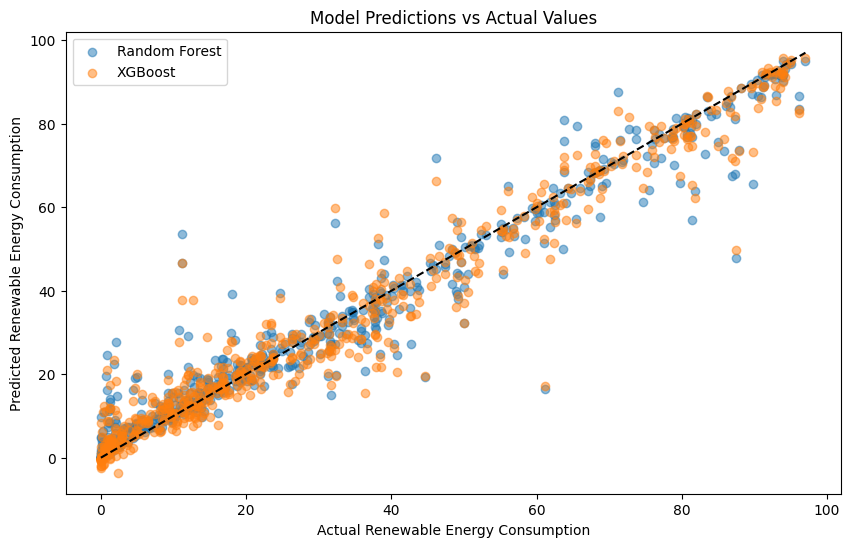

In [112]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs. Predicted values
plt.figure(figsize=(10, 6))
#plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.5)
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.5)
plt.scatter(y_test, y_pred_xgb, label="XGBoost", alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color="black")
plt.xlabel("Actual Renewable Energy Consumption")
plt.ylabel("Predicted Renewable Energy Consumption")
plt.title("Model Predictions vs Actual Values")
plt.legend()
plt.show()


**Plotting Residuals**

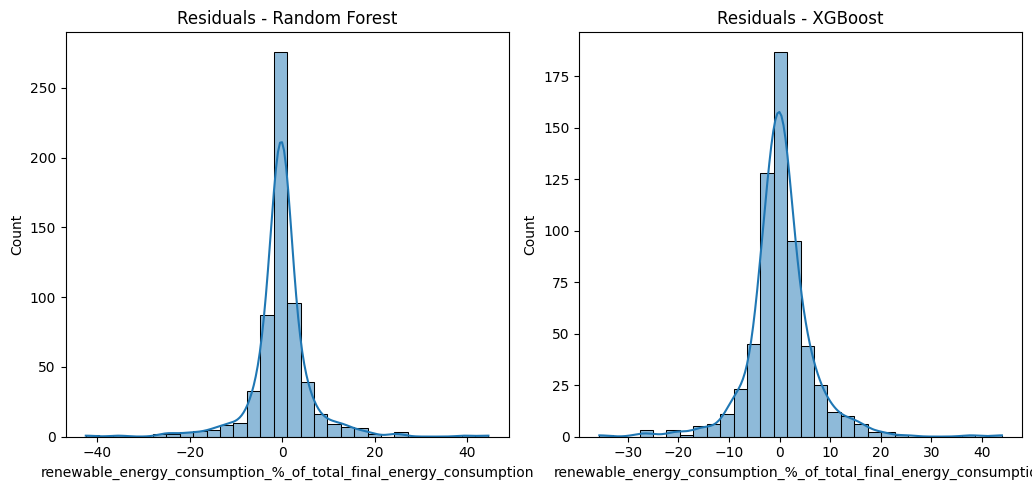

In [113]:
import seaborn as sns

# Residual plots for each model
plt.figure(figsize=(15, 5))

# Random Forest Residuals
plt.subplot(1, 3, 2)
sns.histplot(y_test - y_pred_rf, kde=True, bins=30)
plt.title("Residuals - Random Forest")

# XGBoost Residuals
plt.subplot(1, 3, 3)
sns.histplot(y_test - y_pred_xgb, kde=True, bins=30)
plt.title("Residuals - XGBoost")

plt.tight_layout()
plt.show()


**Plotting Feature Importance**

<ipython-input-114-4f8961e05a95>:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


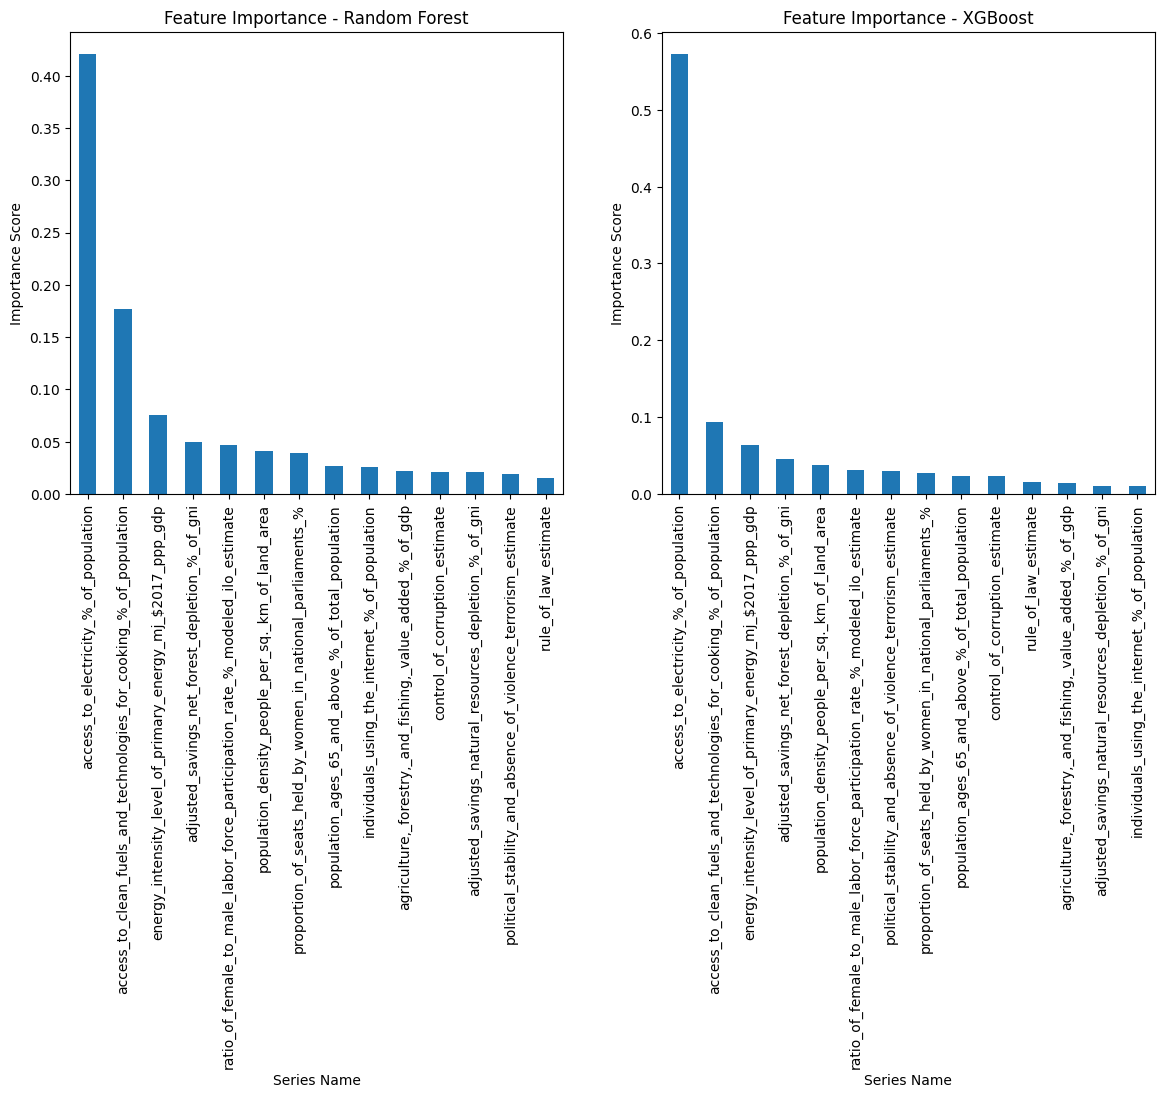

In [114]:
# Feature Importance from Random Forest
rf_importance = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Feature Importance from XGBoost
xgb_importance = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot feature importances
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Random Forest Feature Importance
rf_importance.plot(kind="bar", ax=axes[0])
axes[0].set_title("Feature Importance - Random Forest")
axes[0].set_ylabel("Importance Score")

# XGBoost Feature Importance
xgb_importance.plot(kind="bar", ax=axes[1])
axes[1].set_title("Feature Importance - XGBoost")
axes[1].set_ylabel("Importance Score")

plt.tight_layout()
plt.show()


**Plotting Errors in Models**

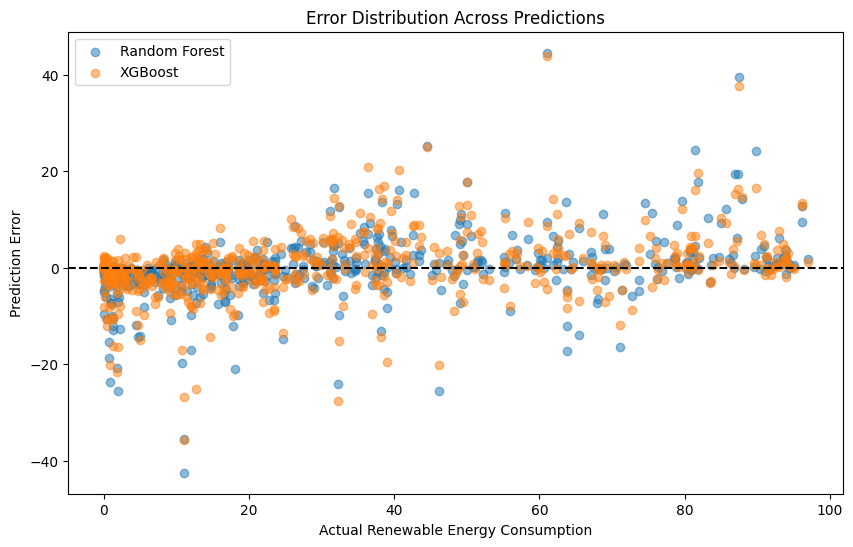

In [115]:
plt.figure(figsize=(10, 6))

# Scatter plot: Error vs. Actual Values
#plt.scatter(y_test, y_test - y_pred_lr, label="Linear Regression", alpha=0.5)
plt.scatter(y_test, y_test - y_pred_rf, label="Random Forest", alpha=0.5)
plt.scatter(y_test, y_test - y_pred_xgb, label="XGBoost", alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Actual Renewable Energy Consumption")
plt.ylabel("Prediction Error")
plt.title("Error Distribution Across Predictions")
plt.legend()
plt.show()
